# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Parameter-Estimation-Analysis" data-toc-modified-id="Parameter-Estimation-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parameter Estimation Analysis</a></div><div class="lev2 toc-item"><a href="#Imports-and-Get-Model" data-toc-modified-id="Imports-and-Get-Model-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports and Get Model</a></div><div class="lev1 toc-item"><a href="#Simulate-parameter-estimation-data-to-work-with" data-toc-modified-id="Simulate-parameter-estimation-data-to-work-with-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate parameter estimation data to work with</a></div><div class="lev2 toc-item"><a href="#Format-PE-Data" data-toc-modified-id="Format-PE-Data-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Format PE Data</a></div><div class="lev1 toc-item"><a href="#RSS-Versus-Iteration" data-toc-modified-id="RSS-Versus-Iteration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RSS Versus Iteration</a></div><div class="lev1 toc-item"><a href="#Visualize-distributions-with-boxplots-and-histograms" data-toc-modified-id="Visualize-distributions-with-boxplots-and-histograms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize distributions with boxplots and histograms</a></div><div class="lev1 toc-item"><a href="#Time-Course-Ensemble" data-toc-modified-id="Time-Course-Ensemble-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time Course Ensemble</a></div><div class="lev1 toc-item"><a href="#PCA" data-toc-modified-id="PCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PCA</a></div><div class="lev2 toc-item"><a href="#Identify-similar-parameter-sets" data-toc-modified-id="Identify-similar-parameter-sets-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Identify similar parameter sets</a></div><div class="lev1 toc-item"><a href="#Identify-parameters-with-similar-variance-with-PCA" data-toc-modified-id="Identify-parameters-with-similar-variance-with-PCA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Identify parameters with similar variance with PCA</a></div><div class="lev2 toc-item"><a href="#Parsing-Data" data-toc-modified-id="Parsing-Data-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Parsing Data</a></div><div class="lev2 toc-item"><a href="#Visualize-Optimization-Performance" data-toc-modified-id="Visualize-Optimization-Performance-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Visualize Optimization Performance</a></div><div class="lev2 toc-item"><a href="#Simulations-Versus-Experiment-Plots" data-toc-modified-id="Simulations-Versus-Experiment-Plots-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Simulations Versus Experiment Plots</a></div><div class="lev2 toc-item"><a href="#Boxplots" data-toc-modified-id="Boxplots-74"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Boxplots</a></div><div class="lev2 toc-item"><a href="#Histograms" data-toc-modified-id="Histograms-75"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Histograms</a></div><div class="lev2 toc-item"><a href="#Scatter-Graphs" data-toc-modified-id="Scatter-Graphs-76"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Scatter Graphs</a></div><div class="lev2 toc-item"><a href="#Hex-Maps" data-toc-modified-id="Hex-Maps-77"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Hex Maps</a></div>

# Parameter Estimation Analysis

Features:

* Parse parameter estimation data into a python environment (`pandas.DataFrame`)
* Plot:
    * Boxplots
    * RSS Vs Iteration
    * Histograms
    * PCA 
    * Linear regression coefficients between variables 
    * Time course ensembles
    

## Imports and Get Model

In [1]:
%matplotlib inline
import os,glob
import site
site.addsitedir('/home/b3053674/Documents/PyCoTools')
import PyCoTools
from PyCoTools.PyCoToolsTutorial import test_models
import os
import pandas
import logging
logging.basicConfig(format = '%(levelname)s:%(message)s')
LOG=logging.getLogger()

##this can be anywhere you like
tutorial_directory = '/home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial'
## module containing copasi models in string format
TM = test_models.TestModels()
kholodenko_model_string = TM.get_kholodenko_variant1() ## published kholodenko model
kholodenko_model = os.path.join(tutorial_directory, 'kholodenko_model.cps')

with open(kholodenko_model, 'w') as f:
    f.write(kholodenko_model_string)

LOG.info('written kholodenko model to {}'.format(kholodenko_model))
LOG.info('Checking that kholodenko file exists: ... {}'.format(os.path.isfile(kholodenko_model)))

INFO:root:__init__:<module>:26:Initializing PyCoTools
INFO:root:__init__:<module>:27:Initializing logging System
INFO:root:__init__:<module>:28:logging config file at: /home/b3053674/Documents/PyCoTools/PyCoTools/logging_config.conf
INFO:root:<ipython-input-1-f58b6052b3b5>:<module>:23:written kholodenko model to /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/kholodenko_model.cps
INFO:root:<ipython-input-1-f58b6052b3b5>:<module>:24:Checking that kholodenko file exists: ... True


# Simulate parameter estimation data to work with

In [2]:
TC = PyCoTools.pycopi.TimeCourse(kholodenko_model, end=1000,
                                 intervals=10, step_size=100)

config_file = os.path.join(os.path.dirname(kholodenko_model), 'PEAnalysisConfigFile.xlsx')
results_dir = os.path.join(os.path.dirname(kholodenko_model), 'PEAnalysisEstimations')
RMPE = PyCoTools.pycopi.RunMultiplePEs(kholodenko_model, TC['report_name'],
                                       copy_number=6, pe_number=5, 
                                       method='GeneticAlgorithm',
                                       population_size=25,
                                       number_of_generations=25,
                                       metabolites=[], global_quantities=[],
                                       lower_bound=0.1, upper_bound=100, 
                                       config_filename=config_file,
                                       results_directory= results_dir)

RMPE.write_config_template()
RMPE.setup()
#RMPE.run()





INFO:PyCoTools.pycopi:pycopi:write_config_template:4479:writing PE config template for model: /home/b3053674/Documents/PyCoTools/PyCoTools/PyCoToolsTutorial/kholodenko_model.cps


## Format PE Data
Must wait until models have finished simulating

In [ ]:
RMPE.format_results()

# RSS Versus Iteration

Interpretation:

* Step like shaped RSS Vs Iteration plot means optimization is performing well as multiple parmeter sets are finding the same minima
* Smooth curves on this plot indicate poor choice of algorithm or algorithm settings and the optimization should be rerun

In [ ]:
PyCoTools.PEAnalysis.RssVsIterations(RMPE['results_directory'])

# Visualize distributions with boxplots and histograms

Interpretation:

* Tight normal shaped distributions indicate parameter is well constrained by the optimization. 
* Wide uniform-like distributions indicate probable non-identifiabilities, i.e. correlations with other parameters. 
* Wide uniform-like distributions for only half a plot indicate probable non-identifiabilities in one direction (prctical non-identifiabiltiies) 
* When the majority of iterations have hit the boundary, increase boundary in that direction

In [ ]:
PyCoTools.PEAnalysis.Boxplot(RMPE['results_directory'], num_per_plot=10)

# Time Course Ensemble

Features:
* Insert each parameter set in turn into the model and simulate a time course.
* Visualize the resulting time course with seaborn.tsplot.
* Confidence intervals are mean, determined by 20000 bootstraps by default
    * Optionally pass another estimator (ie. np.mean) and number of bootstraps to estimator and n_boot respectively.  
* Accepts TruncateData kwargs for selecting only a subset of data

Interpretation: 
* Displayed band around curve shows confidence interval (ci=0.95 by default) of trajectory. 
* Profiles with large confidence intervals are poorly constrained profiles and poor predictors. They are also good choices for experimental measurement

In [ ]:
PyCoTools.PEAnalysis.EnsembleTimeCourse(kholodenko_model, TC['report_name'],
                                        RMPE['results_directory'], 
                                        truncate_mode='percent',x=100)

# PCA
## Identify similar parameter sets
Features:

* Reduce the dimensionality of the data to number of parameter estimation runs you have (here n=30). 
Interpretation
* Parameter sets that project close together onto 2D space are similar
* Ideally all parameter sets would projecte onto a single cluster at the global minimum.

In [ ]:
PyCoTools.PEAnalysis.Pca(RMPE['results_directory'], by='iterations', log10=True)

# Identify parameters with similar variance with PCA
Features:
* Reduce data dimension to number of estimated parameters. 

Interpretation:
* Parameters that cluster together may be correlated due to similar variances (i.e. if one goes up as the other goes down)   

INFO:PyCoTools.PEAnalysis:PEAnalysis:__init__:375:plotting PCA parameters


<PyCoTools.PEAnalysis.Pca instance at 0x7f9a47573758>

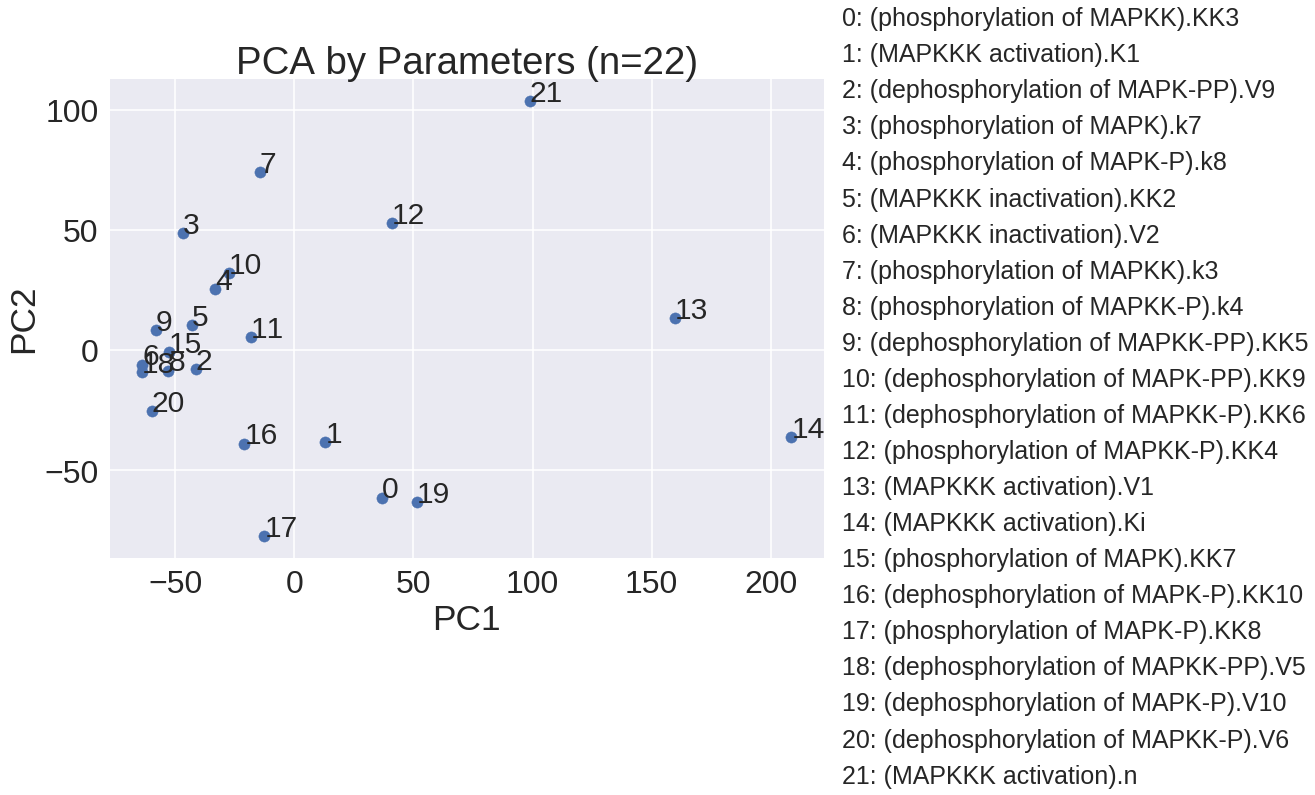

In [5]:
PyCoTools.PEAnalysis.Pca(RMPE['results_directory'], by='parameters',
                        legend_position=(230,135,15),annotation_fontsize=30)